1.

## A.saya dan tim saya mengambil bidang saham pada mobil tesla

## B.saya mendapatkan dataset harga saham mobil tesla yaitu dengan mencari di kagle. Di dalam dataset tersebut kumpulan data yg memberikan gambaran tentang kinerja saham tesla pada 3 dekade terakhir.TSLA adalah salah satu produsen kendaraan listrik paling dikenal di dunia dan sahamnya mengalami volalitas yg cukup besar sehingga menjadikanya aset yg paling populer bagi para investor,analis dan penggemar. Dataset ini mencangkup beberapa kolom kolom yaitu Tanggal data saham, Harga pembukaan saham tesla pada tanggal tertentu, Mengetahui harga tertinngi pada saham tesla pada tanggal tersebut, Mengetahui harga terendah pada saham tesla pada tanggal tersebut, Harga penutupan saham tesla pada tanggal tersebut, Jumlah total saham yg di perdagangkan pada tanggal tersebut.

## C.Memeriksa Tipe Data

In [5]:
import pyspark.sql.functions as F
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("CekTipeData").getOrCreate()

df = spark.read.csv("/content/TESLA.csv", header=True, inferSchema=True)

df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- Date: string (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Adj Close: double (nullable = true)
 |-- Volume: integer (nullable = true)



## C.Mengganti Nama Kolom

In [6]:
df = df.withColumnRenamed("c0", "col0") \
       .withColumnRenamed("Date", "tgl") \
       .withColumnRenamed("Open", "buka") \
       .withColumnRenamed("High", "tinggi") \
       .withColumnRenamed("Low", "rendah") \
       .withColumnRenamed("Close", "tutup") \
       .withColumnRenamed("Adj Close", "adj_tutup") \
       .withColumnRenamed("Volume", "vol")
df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- tgl: string (nullable = true)
 |-- buka: double (nullable = true)
 |-- tinggi: double (nullable = true)
 |-- rendah: double (nullable = true)
 |-- tutup: double (nullable = true)
 |-- adj_tutup: double (nullable = true)
 |-- vol: integer (nullable = true)



In [7]:
df.show(100)

+---+--------+-----------+-----------+-----------+-----------+-----------+---------+
|_c0|     tgl|       buka|     tinggi|     rendah|      tutup|  adj_tutup|      vol|
+---+--------+-----------+-----------+-----------+-----------+-----------+---------+
|  0| 6/29/10|1.266667008|1.666666985|1.169332981|1.592666984|1.592666984|281494500|
|  1| 6/30/10|1.719333053|2.028000116|1.553333044|1.588667035|1.588667035|257806500|
|  2|  7/1/10|1.666666985|1.728000045|1.351333022|1.463999987|1.463999987|123282000|
|  3|  7/2/10|1.533332944|1.539999962| 1.24733305|1.279999971|1.279999971| 77097000|
|  4|  7/6/10|1.333333015|1.333333015|1.055333018|1.074000001|1.074000001|103003500|
|  5|  7/7/10|1.093333006|1.108667016|0.998667002|1.053333044|1.053333044|103825500|
|  6|  7/8/10|1.075999975|1.167999983|1.037999988|1.164000034|1.164000034|115671000|
|  7|  7/9/10|1.172000051| 1.19333303|1.103332996|1.159999967|1.159999967| 60759000|
|  8| 7/12/10|1.196666956|1.204666972|1.133332968|1.136667013|1.1

## C.Memeriksa Nilai Null

In [8]:
import pyspark.sql.functions as F

# Menghitung jumlah nilai null pada setiap kolom
df.select([F.count(F.when(F.isnull(c), c)).alias(c) for c in df.columns]).show()

# Menampilkan baris yang mengandung nilai null pada kolom "tgl"
df.filter(F.isnull(F.col("tgl"))).show()

+---+---+----+------+------+-----+---------+---+
|_c0|tgl|buka|tinggi|rendah|tutup|adj_tutup|vol|
+---+---+----+------+------+-----+---------+---+
|  0|  0|   0|     0|     0|    0|        0|  0|
+---+---+----+------+------+-----+---------+---+

+---+---+----+------+------+-----+---------+---+
|_c0|tgl|buka|tinggi|rendah|tutup|adj_tutup|vol|
+---+---+----+------+------+-----+---------+---+
+---+---+----+------+------+-----+---------+---+



In [9]:
import pyspark.sql.functions as F

# Menghitung jumlah nilai null pada setiap kolom
df.select([F.sum(F.when(F.isnull(c), 1).otherwise(0)).alias(c) for c in df.columns]).show()

+---+---+----+------+------+-----+---------+---+
|_c0|tgl|buka|tinggi|rendah|tutup|adj_tutup|vol|
+---+---+----+------+------+-----+---------+---+
|  0|  0|   0|     0|     0|    0|        0|  0|
+---+---+----+------+------+-----+---------+---+



In [10]:
df.filter(F.col("tgl").isNull()).show()

df.filter(F.col("buka").isNull()).show()

+---+---+----+------+------+-----+---------+---+
|_c0|tgl|buka|tinggi|rendah|tutup|adj_tutup|vol|
+---+---+----+------+------+-----+---------+---+
+---+---+----+------+------+-----+---------+---+

+---+---+----+------+------+-----+---------+---+
|_c0|tgl|buka|tinggi|rendah|tutup|adj_tutup|vol|
+---+---+----+------+------+-----+---------+---+
+---+---+----+------+------+-----+---------+---+



## C.Menampilkan Nilai Sumary

In [11]:
import pyspark.sql.functions as F

df.describe().show()

+-------+-----------------+-------+------------------+-----------------+------------------+------------------+------------------+-------------------+
|summary|              _c0|    tgl|              buka|           tinggi|            rendah|             tutup|         adj_tutup|                vol|
+-------+-----------------+-------+------------------+-----------------+------------------+------------------+------------------+-------------------+
|  count|             3637|   3637|              3637|             3637|              3637|              3637|              3637|               3637|
|   mean|           1818.0|   NULL| 80.08057396726478| 81.8327098768875| 78.21927645228948| 80.06795196634039| 80.06795196634039|9.667329755292824E7|
| stddev|1050.055792168524|   NULL|105.46613092977255|107.8071696743339|102.93120789566268|105.40944792971469|105.40944792971469|7.787314294808559E7|
|    min|                0|1/10/11|       1.075999975|      1.108667016|       0.998667002|       1.

## C.Menampilkan Matriks Korelasinya  

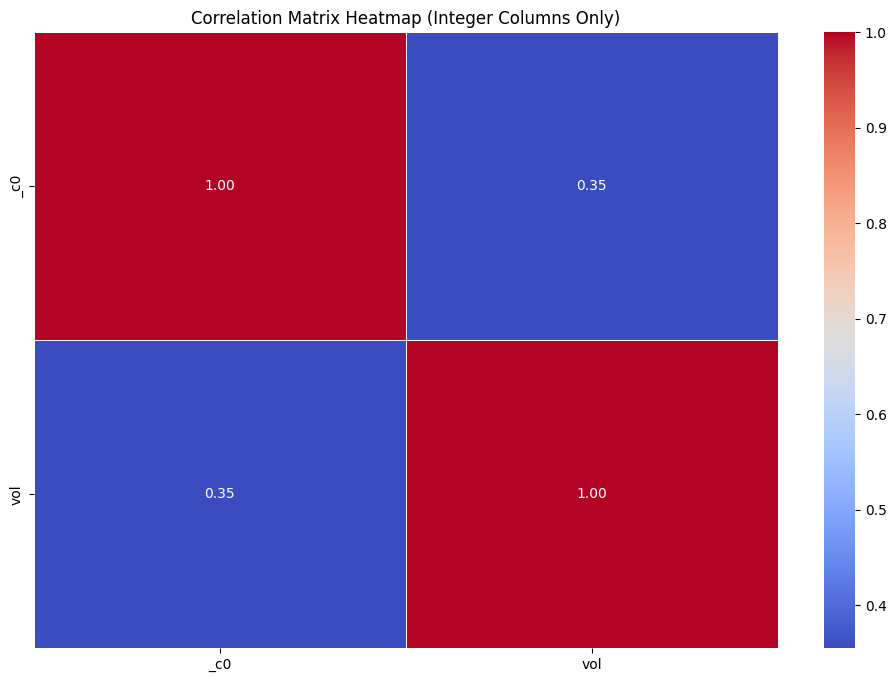

In [12]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation
import seaborn as sns
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation
import seaborn as sns
import matplotlib.pyplot as plt

integer_columns = [col_name for col_name, col_type in df.dtypes if col_type == 'int']
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation
import seaborn as sns
import matplotlib.pyplot as plt

integer_columns = [col_name for col_name, col_type in df.dtypes if col_type == 'int']
vector_assembler = VectorAssembler(inputCols=integer_columns, outputCol="features")
df_assembled = vector_assembler.transform(df).select("features")
matrix = Correlation.corr(df_assembled, "features").head()
correlation_matrix = matrix[0].toArray()
column_names = df_assembled.schema["features"].metadata["ml_attr"]["attrs"]["numeric"]
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5,
            xticklabels=[col["name"] for col in column_names],
            yticklabels=[col["name"] for col in column_names])
plt.title("Correlation Matrix Heatmap (Integer Columns Only)")
plt.show()

## D.exploratory data analysis (EDA) bar dan pie

<ipython-input-13-9d15355cf6be>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('/content/TESLA.csv', parse_dates=['Date'])


        Unnamed: 0                           Date        Open        High  \
count   237.000000                            237  237.000000  237.000000   
mean   3518.000000  2024-06-20 23:53:55.443037952  217.609579  222.198439   
min    3400.000000            2024-01-02 00:00:00  140.559998  144.440002   
25%    3459.000000            2024-03-27 00:00:00  179.990005  183.259995   
50%    3518.000000            2024-06-21 00:00:00  208.630005  213.190002   
75%    3577.000000            2024-09-16 00:00:00  241.809998  246.210007   
max    3636.000000            2024-12-09 00:00:00  397.609985  404.799988   
std      68.560193                            NaN   50.015113   51.423516   

              Low       Close   Adj Close        Volume  
count  237.000000  237.000000  237.000000  2.370000e+02  
mean   213.061603  217.699241  217.699241  9.468827e+07  
min    138.800003  142.050003  142.050003  3.716760e+07  
25%    175.580002  178.789993  178.789993  7.098810e+07  
50%    204.82000

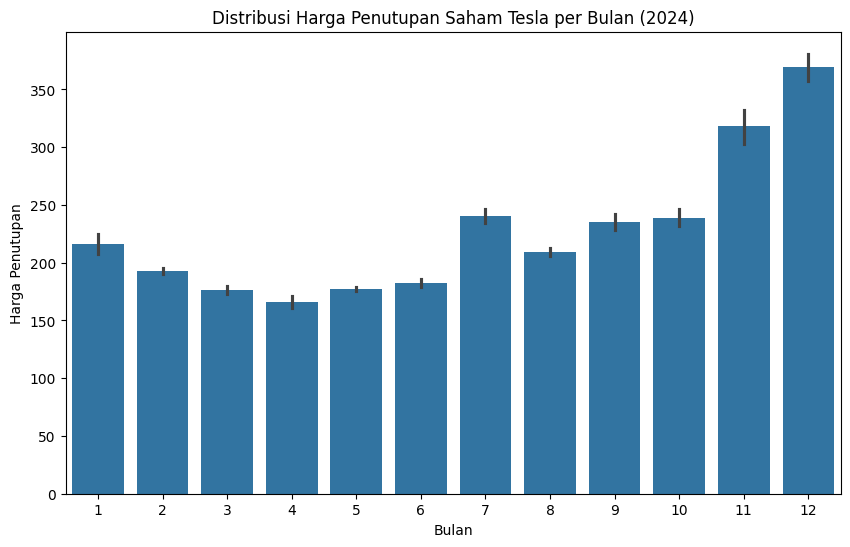

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/TESLA.csv', parse_dates=['Date'])

# Filter data untuk tahun 2024
df_2024 = df[df['Date'].dt.year == 2024]

# Analisis deskriptif
print(df_2024.describe())

# Visualisasi menggunakan bar chart
# Distribusi harga penutupan per bulan
plt.figure(figsize=(10, 6))
sns.barplot(x=df_2024['Date'].dt.month, y='Close', data=df_2024)
plt.title('Distribusi Harga Penutupan Saham Tesla per Bulan (2024)')
plt.xlabel('Bulan')
plt.ylabel('Harga Penutupan')
plt.show()

<ipython-input-14-0c9f2e045c23>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024.loc[df_2024['Volume'] > volume_median, 'VolumeCategory'] = 'Tinggi'


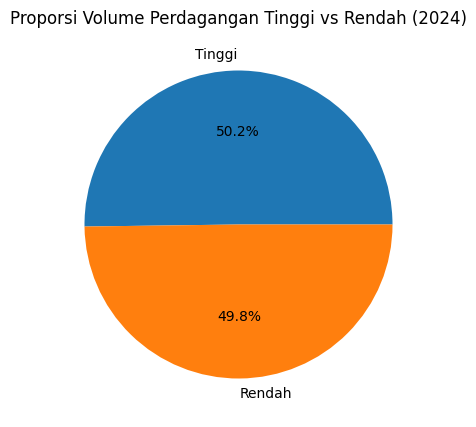

In [14]:
volume_median = df_2024['Volume'].median()
df_2024.loc[df_2024['Volume'] > volume_median, 'VolumeCategory'] = 'Tinggi'
df_2024.loc[df_2024['Volume'] <= volume_median, 'VolumeCategory'] = 'Rendah'


plt.figure(figsize=(5, 5))
labels = df_2024['VolumeCategory'].unique()
plt.pie(df_2024['VolumeCategory'].value_counts(), labels=labels, autopct='%1.1f%%')
plt.title('Proporsi Volume Perdagangan Tinggi vs Rendah (2024)')
plt.show()

<ipython-input-15-2fdc04cc4a09>:5: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv('/content/TESLA.csv', parse_dates=['Date'], infer_datetime_format=True)
<ipython-input-15-2fdc04cc4a09>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('/content/TESLA.csv', parse_dates=['Date'], infer_datetime_format=True)


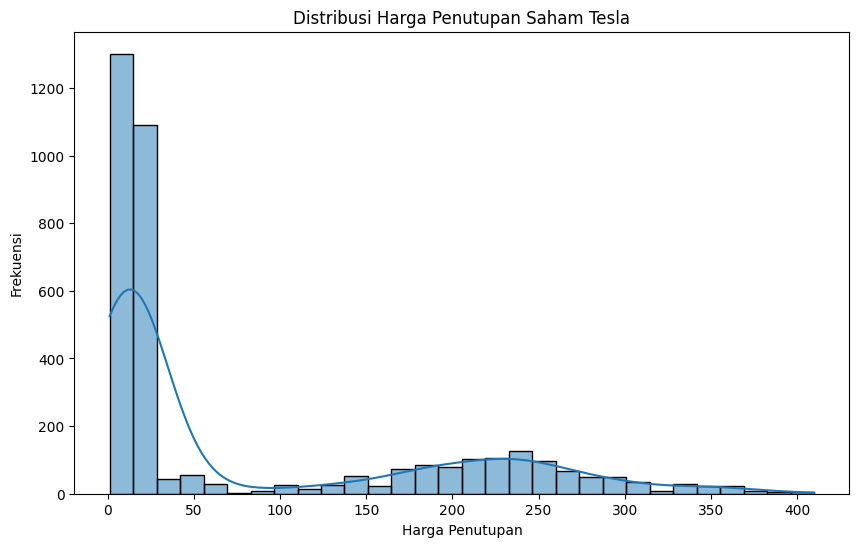

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/TESLA.csv', parse_dates=['Date'], infer_datetime_format=True)

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Adj Close', bins=30, kde=True)
plt.title('Distribusi Harga Penutupan Saham Tesla')
plt.xlabel('Harga Penutupan')
plt.ylabel('Frekuensi')
plt.show()

## 2.A

## Random Forest

In [16]:
from pyspark.sql import SparkSession
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.sql.functions import when

spark = SparkSession.builder.appName("RandomForestExample").getOrCreate()

data = spark.read.csv("/content/TESLA.csv", header=True, inferSchema=True)

feature_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
data = assembler.transform(data)

data = data.withColumn("label", when(data["Close"] > data["Open"], 1).otherwise(0))

train_data, test_data = data.randomSplit([0.8, 0.2])

rf = RandomForestClassifier(labelCol="label", featuresCol="features")
model = rf.fit(train_data)

predictions = model.transform(test_data)
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)

print(f"Accuracy: {accuracy}")

Accuracy: 0.5549132947976878


## Gradient Boost Tree

In [17]:
from pyspark.ml.classification import GBTClassifier

gbt = GBTClassifier(labelCol="label", featuresCol="features")
gbt_model = gbt.fit(train_data)

gbt_predictions = gbt_model.transform(test_data)
gbt_accuracy = evaluator.evaluate(gbt_predictions)

print(f"GBT Accuracy: {gbt_accuracy}")


GBT Accuracy: 0.6026011560693642


## Logistic Regression

In [18]:
from pyspark.ml.classification import LogisticRegression

lr = LogisticRegression(labelCol="label", featuresCol="features")
lr_model = lr.fit(train_data)

lr_predictions = lr_model.transform(test_data)
lr_accuracy = evaluator.evaluate(lr_predictions)

print(f"Logistic Regression Accuracy: {lr_accuracy}")


Logistic Regression Accuracy: 0.9971098265895953


## Decision Tree Classifier

In [19]:
from pyspark.ml.classification import DecisionTreeClassifier

dt = DecisionTreeClassifier(labelCol="label", featuresCol="features")
dt_model = dt.fit(train_data)

dt_predictions = dt_model.transform(test_data)
dt_accuracy = evaluator.evaluate(dt_predictions)

print(f"Decision Tree Accuracy: {dt_accuracy}")


Decision Tree Accuracy: 0.5028901734104047


In [20]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator

# Untuk AUC
evaluator_auc = BinaryClassificationEvaluator(labelCol="label", rawPredictionCol="rawPrediction", metricName="areaUnderROC")
auc = evaluator_auc.evaluate(predictions)

# Untuk Akurasi
evaluator_accuracy = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator_accuracy.evaluate(predictions)

# Untuk Presisi dan Recall
evaluator_precision = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="weightedPrecision")
precision = evaluator_precision.evaluate(predictions)

evaluator_recall = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="weightedRecall")
recall = evaluator_recall.evaluate(predictions)

# Untuk F1 Score
evaluator_f1 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="f1")
f1_score = evaluator_f1.evaluate(predictions)

# Menampilkan hasil
print(f"AUC: {auc}")
print(f"Akurasi: {accuracy}")
print(f"Presisi: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")


AUC: 0.576881156990149
Akurasi: 0.5549132947976878
Presisi: 0.5713838706229177
Recall: 0.5549132947976879
F1 Score: 0.54684248548808


## B.classification 2 model (Gradient Boost Tree dan Logistic Regression)

In [21]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

# Definisikan Logistic Regression
lr = LogisticRegression(labelCol="label", featuresCol="features")

# Buat grid hyperparameter untuk diuji
param_grid = (ParamGridBuilder()
              .addGrid(lr.regParam, [0.01, 0.1, 1.0])  # Regularization parameter
              .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0])  # Elastic Net mixing parameter
              .build())

# Evaluator untuk menghitung performa model
evaluator = BinaryClassificationEvaluator(labelCol="label", metricName="areaUnderROC")

# Definisikan CrossValidator
cross_validator = CrossValidator(estimator=lr,
                                  estimatorParamMaps=param_grid,
                                  evaluator=evaluator,
                                  numFolds=5)  # Cross-validation dengan 5 fold

# Lakukan fitting model dengan data latih
cv_model = cross_validator.fit(train_data)

# Gunakan model terbaik untuk prediksi pada data uji
best_model = cv_model.bestModel
lr_predictions = best_model.transform(test_data)

# Evaluasi model terbaik
lr_accuracy = evaluator.evaluate(lr_predictions)
print(f"Logistic Regression Accuracy (Best Model): {lr_accuracy}")

# Hyperparameter terbaik
print("Best Model Parameters:")
print(f"  regParam: {best_model._java_obj.getRegParam()}")
print(f"  elasticNetParam: {best_model._java_obj.getElasticNetParam()}")

Logistic Regression Accuracy (Best Model): 0.6132886187382101
Best Model Parameters:
  regParam: 0.01
  elasticNetParam: 0.0


In [22]:
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

# Definisikan GBTClassifier
gbt = GBTClassifier(labelCol="label", featuresCol="features", seed=42)

# Buat grid hyperparameter untuk diuji
param_grid = (ParamGridBuilder()
              .addGrid(gbt.maxDepth, [3, 5, 7])  # Kedalaman maksimum pohon
              .addGrid(gbt.maxIter, [10, 20, 30])  # Jumlah iterasi boosting
              .addGrid(gbt.stepSize, [0.1, 0.2, 0.3])  # Learning rate
              .build())

# Evaluator untuk menghitung performa model
evaluator = BinaryClassificationEvaluator(labelCol="label", metricName="areaUnderROC")

# Definisikan CrossValidator
cross_validator = CrossValidator(estimator=gbt,
                                  estimatorParamMaps=param_grid,
                                  evaluator=evaluator,
                                  numFolds=5)  # Cross-validation dengan 5 fold

# Lakukan fitting model dengan data latih
cv_model = cross_validator.fit(train_data)

# Gunakan model terbaik untuk prediksi pada data uji
best_model = cv_model.bestModel
gbt_predictions = best_model.transform(test_data)

# Evaluasi model terbaik
gbt_accuracy = evaluator.evaluate(gbt_predictions)
print(f"GBT Accuracy (Best Model): {gbt_accuracy}")

# Hyperparameter terbaik
print("Best Model Parameters:")
print(f"  maxDepth: {best_model.getOrDefault('maxDepth')}")
print(f"  maxIter: {best_model.getOrDefault('maxIter')}")
print(f"  stepSize: {best_model.getOrDefault('stepSize')}")

GBT Accuracy (Best Model): 0.696818277090757
Best Model Parameters:
  maxDepth: 5
  maxIter: 30
  stepSize: 0.3
